In [1]:
# Initial imports.
import pandas as pd
import numpy as np
from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import export_graphviz
import sqlite3

In [2]:
conn = sqlite3.connect('../HomelessData.db')
c = conn.cursor()

In [3]:
# Loading data
df_2016 = pd.read_sql("SELECT * FROM CocData WHERE year = 2016", con = conn)

df_2016.head()

,Coc,TotalBeds,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Year,CocYear,TotalHomeless,Unsheltered,Sheltered,Population,Unemployment
0,AK-500,1007,553,454,0,55,434,97,2016,AK-500 2016,1105,240,865,297249.0,5.300000
1,AK-501,819,542,277,0,17,219,33,2016,AK-501 2016,835,202,633,425879.0,8.554167
2,AL-500,1113,493,586,34,374,1492,93,2016,AL-500 2016,1228,196,1032,958931.0,5.066667
3,AL-501,476,354,122,0,467,504,0,2016,AL-501 2016,623,236,387,622546.0,6.000000
4,AL-502,237,41,196,0,0,36,20,2016,AL-502 2016,337,51,286,208493.0,6.475000


In [4]:
df_2016=df_2016.drop(['TotalHomeless', 'Sheltered', 'TotalBeds', 'CocYear', 'Coc', 'Year'], axis=1)

In [5]:
#df_2016['Unsheltered_div_pop'] = df_2016['Unsheltered'] / df_2016['Population']

In [6]:
#df_2016.head()

In [7]:
df_2016['Unsheltered_perc_pop'] = (df_2016['Unsheltered'] / df_2016['Population']) *100

In [8]:
df_2016.head()

,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Unsheltered,Population,Unemployment,Unsheltered_perc_pop
0,553,454,0,55,434,97,240,297249.0,5.300000,0.080740
1,542,277,0,17,219,33,202,425879.0,8.554167,0.047431
2,493,586,34,374,1492,93,196,958931.0,5.066667,0.020439
3,354,122,0,467,504,0,236,622546.0,6.000000,0.037909
4,41,196,0,0,36,20,51,208493.0,6.475000,0.024461


In [9]:
df_2016['ES_beds_perc_pop'] = (df_2016['Emergency'] / df_2016['Population']) *100

In [10]:
df_2016['TS_beds_perc_pop'] = (df_2016['Transitional'] / df_2016['Population']) *100

In [11]:
df_2016['SH_beds_perc_pop'] = (df_2016['SafeHaven'] / df_2016['Population']) *100

In [12]:
df_2016['RRH_units_perc_pop'] = (df_2016['RapidRehousing'] / df_2016['Population']) *100

In [13]:
df_2016['RRH_units_perc_pop'] = (df_2016['RapidRehousing'] / df_2016['Population']) *100

In [14]:
df_2016['PSH_units_perc_pop'] = (df_2016['PermanentSupportive'] / df_2016['Population']) *100

In [15]:
df_2016['OPH_units_perc_pop'] = (df_2016['PermanentOther'] / df_2016['Population']) *100

In [16]:
df_2016.head()

,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Unsheltered,Population,Unemployment,Unsheltered_perc_pop,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,553,454,0,55,434,97,240,297249.0,5.300000,0.080740,0.186039,0.152734,0.000000,0.018503,0.146006,0.032633
1,542,277,0,17,219,33,202,425879.0,8.554167,0.047431,0.127266,0.065042,0.000000,0.003992,0.051423,0.007749
2,493,586,34,374,1492,93,196,958931.0,5.066667,0.020439,0.051411,0.061110,0.003546,0.039002,0.155590,0.009698
3,354,122,0,467,504,0,236,622546.0,6.000000,0.037909,0.056863,0.019597,0.000000,0.075015,0.080958,0.000000
4,41,196,0,0,36,20,51,208493.0,6.475000,0.024461,0.019665,0.094008,0.000000,0.000000,0.017267,0.009593


In [17]:
df_2016=df_2016.drop(['Emergency', 'Transitional', 'SafeHaven', 'RapidRehousing', 'PermanentSupportive', 'PermanentOther', 'Unsheltered'], axis=1)

In [18]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            370 non-null    float64
 1   Unemployment          370 non-null    float64
 2   Unsheltered_perc_pop  370 non-null    float64
 3   ES_beds_perc_pop      370 non-null    float64
 4   TS_beds_perc_pop      370 non-null    float64
 5   SH_beds_perc_pop      370 non-null    float64
 6   RRH_units_perc_pop    370 non-null    float64
 7   PSH_units_perc_pop    370 non-null    float64
 8   OPH_units_perc_pop    370 non-null    float64
dtypes: float64(9)
memory usage: 26.1 KB


In [19]:
df_2016.head()

,Population,Unemployment,Unsheltered_perc_pop,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,297249.0,5.300000,0.080740,0.186039,0.152734,0.000000,0.018503,0.146006,0.032633
1,425879.0,8.554167,0.047431,0.127266,0.065042,0.000000,0.003992,0.051423,0.007749
2,958931.0,5.066667,0.020439,0.051411,0.061110,0.003546,0.039002,0.155590,0.009698
3,622546.0,6.000000,0.037909,0.056863,0.019597,0.000000,0.075015,0.080958,0.000000
4,208493.0,6.475000,0.024461,0.019665,0.094008,0.000000,0.000000,0.017267,0.009593


In [20]:
# Define the features set.
X = df_2016.copy()
X = X.drop("Unsheltered_perc_pop", axis=1)
X.head()

,Population,Unemployment,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,297249.0,5.300000,0.186039,0.152734,0.000000,0.018503,0.146006,0.032633
1,425879.0,8.554167,0.127266,0.065042,0.000000,0.003992,0.051423,0.007749
2,958931.0,5.066667,0.051411,0.061110,0.003546,0.039002,0.155590,0.009698
3,622546.0,6.000000,0.056863,0.019597,0.000000,0.075015,0.080958,0.000000
4,208493.0,6.475000,0.019665,0.094008,0.000000,0.000000,0.017267,0.009593


In [21]:
# Define the target set.
y = df_2016["Unsheltered_perc_pop"].ravel()
y[:5]

array([0.08074039, 0.04743131, 0.02043943, 0.03790885, 0.02446125])

In [22]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [23]:
regr = RandomForestRegressor(max_depth=3, random_state=0)

In [24]:
reg_model = regr.fit(X, y)

In [25]:
importances = reg_model.feature_importances_
importances

array([0.16369317, 0.12704126, 0.06573776, 0.28280955, 0.0009739 ,
       0.05534416, 0.27944721, 0.02495299])

In [26]:
# We can sort the features by their importance.
sorted(zip(reg_model.feature_importances_, X.columns), reverse=True)

[(0.2828095549180055, 'TS_beds_perc_pop'),
 (0.2794472074042256, 'PSH_units_perc_pop'),
 (0.16369317402775058, 'Population'),
 (0.12704125694299967, 'Unemployment'),
 (0.06573775821195398, 'ES_beds_perc_pop'),
 (0.05534415860766963, 'RRH_units_perc_pop'),
 (0.024952991396423433, 'OPH_units_perc_pop'),
 (0.000973898490971644, 'SH_beds_perc_pop')]

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt

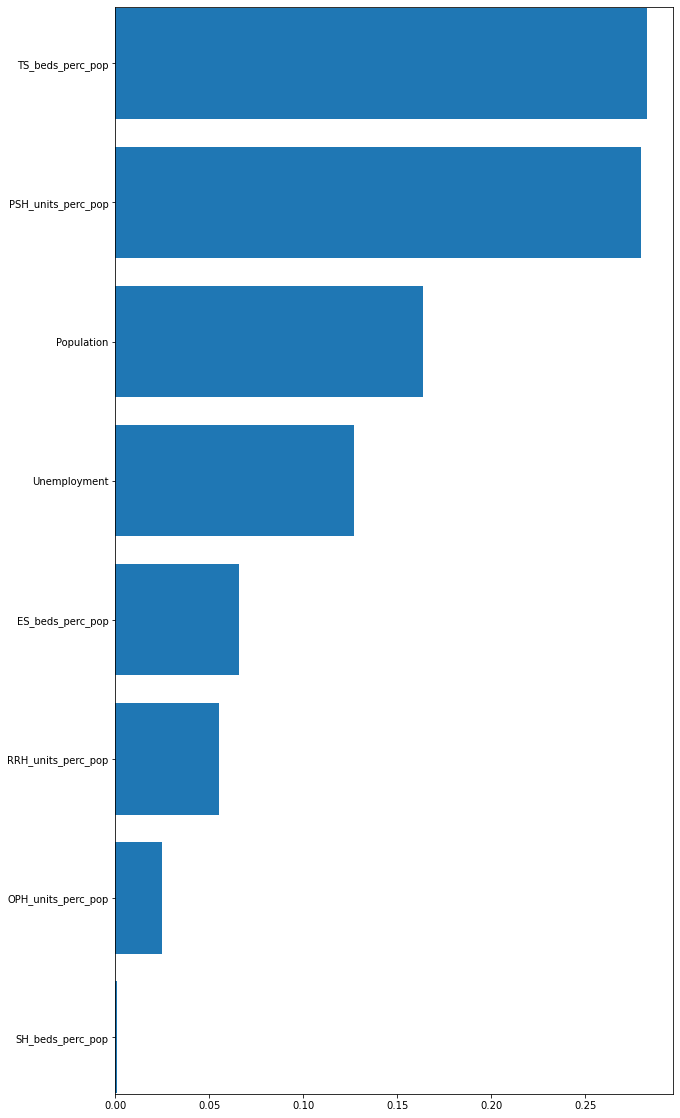

In [28]:
features = sorted(zip(X.columns, reg_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [29]:
estimator = reg_model.estimators_[5]

[Text(0.5, 0.875, 'X[3] <= 0.08\nsquared_error = 0.012\nsamples = 234\nvalue = 0.058'),
 Text(0.25, 0.625, 'X[0] <= 282757.5\nsquared_error = 0.008\nsamples = 196\nvalue = 0.046'),
 Text(0.125, 0.375, 'X[0] <= 279806.0\nsquared_error = 0.023\nsamples = 52\nvalue = 0.085'),
 Text(0.0625, 0.125, 'squared_error = 0.019\nsamples = 51\nvalue = 0.072'),
 Text(0.1875, 0.125, 'squared_error = -0.0\nsamples = 1\nvalue = 0.399'),
 Text(0.375, 0.375, 'X[2] <= 0.128\nsquared_error = 0.002\nsamples = 144\nvalue = 0.034'),
 Text(0.3125, 0.125, 'squared_error = 0.002\nsamples = 139\nvalue = 0.031'),
 Text(0.4375, 0.125, 'squared_error = 0.009\nsamples = 5\nvalue = 0.098'),
 Text(0.75, 0.625, 'X[7] <= 0.001\nsquared_error = 0.03\nsamples = 38\nvalue = 0.124'),
 Text(0.625, 0.375, 'X[5] <= 0.15\nsquared_error = 0.042\nsamples = 22\nvalue = 0.185'),
 Text(0.5625, 0.125, 'squared_error = 0.032\nsamples = 21\nvalue = 0.166'),
 Text(0.6875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.777'),
 Text(0

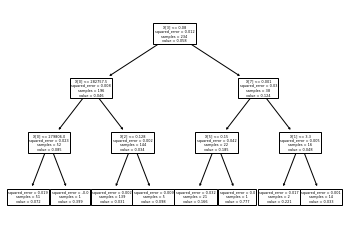

In [30]:
from sklearn import tree
tree.plot_tree(reg_model.estimators_[0])

In [31]:
df_2016.to_csv('2016_converted.csv', index=False)